<a href="https://colab.research.google.com/github/suneelkanthala/My-Work/blob/master/ANN_Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras

## Device Information

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

## Devices list

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16628581444380469793, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14638920512
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 11978333911403283526
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

## Ram Inofrmation

In [3]:
!cat /proc/meminfo

MemTotal:       13333580 kB
MemFree:         9046296 kB
MemAvailable:   11871928 kB
Buffers:           93424 kB
Cached:          2763840 kB
SwapCached:            0 kB
Active:          1272448 kB
Inactive:        2597400 kB
Active(anon):     863116 kB
Inactive(anon):     8576 kB
Active(file):     409332 kB
Inactive(file):  2588824 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               564 kB
Writeback:             0 kB
AnonPages:       1012652 kB
Mapped:           579656 kB
Shmem:              9244 kB
Slab:             184876 kB
SReclaimable:     136564 kB
SUnreclaim:        48312 kB
KernelStack:        5216 kB
PageTables:         9120 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6666788 kB
Committed_AS:    4071356 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
Percpu:             1048 kB
AnonHugePages:   

## CPU Information

In [4]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv('/content/drive/MyDrive/My Work/My_Learning/Churn_Modelling.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
X = data.iloc[:,3:13]
y = data.iloc[:,13]

In [5]:
geo = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [6]:
X = pd.concat([X,geo,gender], axis=1)
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [7]:
X.drop(columns=['Geography', 'Gender'], axis=1, inplace=True)

In [8]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train.shape

(8000, 11)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [13]:
classifier = Sequential()

classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=11))

classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))

classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation = 'sigmoid'))


In [14]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [15]:
classifier.compile(optimizer = 'Adamax', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
model_history=classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
536/536 [==============================] - 2s 2ms/step - loss: 0.6006 - accuracy: 0.7614 - val_loss: 0.5580 - val_accuracy: 0.7910
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5431 - accuracy: 0.7939 - val_loss: 0.5342 - val_accuracy: 0.7910
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5170 - accuracy: 0.7958 - val_loss: 0.5194 - val_accuracy: 0.7910
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4956 - accuracy: 0.8052 - val_loss: 0.5084 - val_accuracy: 0.7910
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4915 - accuracy: 0.7953 - val_loss: 0.4995 - val_accuracy: 0.7910
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4858 - accuracy: 0.7954 - val_loss: 0.4919 - val_accuracy: 0.7910
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4914 - accuracy: 0.7837 - val_loss: 0.4856 - val_accuracy: 0.7910

In [17]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


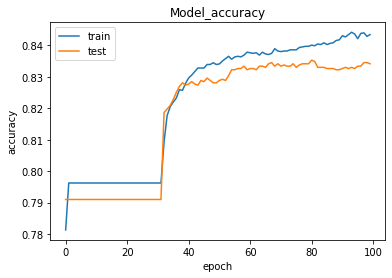

In [18]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [19]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >0.5)

In [20]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [22]:
cm

array([[1553,   54],
       [ 259,  134]])

In [23]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

In [24]:
score

0.8435

In [25]:
classifier = Sequential()
classifier.add(Dense(units=10, kernel_initializer='he_normal', activation='relu', input_dim=11))
classifier.add(Dense(units=20, kernel_initializer='he_normal', activation='relu'))
classifier.add(Dense(units=10, kernel_initializer='he_normal', activation='relu'))
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation = 'sigmoid'))
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                120       
_________________________________________________________________
dense_4 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


In [26]:
classifier.compile(optimizer = 'Adamax', loss='binary_crossentropy', metrics=['accuracy'])
model_history=classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
536/536 [==============================] - 1s 2ms/step - loss: 0.6966 - accuracy: 0.6012 - val_loss: 0.5240 - val_accuracy: 0.7952
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5166 - accuracy: 0.7998 - val_loss: 0.4849 - val_accuracy: 0.8042
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4740 - accuracy: 0.8120 - val_loss: 0.4668 - val_accuracy: 0.8092
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4603 - accuracy: 0.8162 - val_loss: 0.4534 - val_accuracy: 0.8122
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4420 - accuracy: 0.8160 - val_loss: 0.4432 - val_accuracy: 0.8122
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4184 - accuracy: 0.8313 - val_loss: 0.4336 - val_accuracy: 0.8164
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4153 - accuracy: 0.8232 - val_loss: 0.4254 - val_accuracy: 0.8164

In [27]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >0.5)

cm = confusion_matrix(y_test, y_pred)

score = accuracy_score(y_pred, y_test)
print(cm)
print(score)

[[1519   88]
 [ 197  196]]
0.8575


In [28]:
classifier = Sequential()
classifier.add(Dense(units=10, kernel_initializer='he_normal', activation='relu', input_dim=11))
classifier.add(Dropout(0.3))
classifier.add(Dense(units=20, kernel_initializer='he_normal', activation='relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(units=10, kernel_initializer='he_normal', activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation = 'sigmoid'))
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                120       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 20)                220       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                210       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                

In [29]:
classifier.compile(optimizer = 'Adamax', loss='binary_crossentropy', metrics=['accuracy'])
model_history=classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
536/536 [==============================] - 1s 2ms/step - loss: 0.7400 - accuracy: 0.7225 - val_loss: 0.5941 - val_accuracy: 0.7910
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.6585 - accuracy: 0.7706 - val_loss: 0.5647 - val_accuracy: 0.7910
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.6009 - accuracy: 0.7829 - val_loss: 0.5456 - val_accuracy: 0.7910
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5573 - accuracy: 0.7906 - val_loss: 0.5316 - val_accuracy: 0.7910
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5393 - accuracy: 0.7927 - val_loss: 0.5195 - val_accuracy: 0.7910
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5283 - accuracy: 0.7887 - val_loss: 0.5124 - val_accuracy: 0.7910
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5092 - accuracy: 0.8020 - val_loss: 0.5067 - val_accuracy: 0.7910

In [30]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >0.5)

cm = confusion_matrix(y_test, y_pred)

score = accuracy_score(y_pred, y_test)
print(cm)
print(score)

[[1600    7]
 [ 344   49]]
0.8245


In [31]:
import tensorflow
print(tensorflow.__version__)

2.4.0


In [32]:
!pip install keras-tuner

     |████████████████████████████████| 71kB 4.3MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp36-none-any.whl size=78939 sha256=f3282655fc29263972256c87dc0a4ff9ec2692eaa3de95dda0fa6acbcd91aa1a
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15358 sha256=2b8e58f3b0949db1f01a6f6ca30c241f36052583db0afe408ab0df2797493d39
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [33]:
from kerastuner.tuners import RandomSearch

In [55]:
def build_model(hp):
  model = keras.Sequential()
  for i in range(hp.Int('num_layers', 2, 20)):
      model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                          min_value=32,
                                          max_value=512,
                                          step=32),
                              activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))
  model.compile(
      optimizer=keras.optimizers.Adam(
          hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
      loss='binary_crossentropy',
      metrics=['accuracy'])
  return model

In [56]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    # directory='project1',
    # project_name='Churn'
    )

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


In [57]:
tuner.search_space_summary()

Search space summary
Default search space size: 19
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [59]:
tuner.search(X_train, y_train,
             epochs=20,
             validation_data=(X_test, y_test))

INFO:tensorflow:Oracle triggered exit


In [60]:
tuner.search(X_train, y_train,
             epochs=20,
             validation_data=(X_test, y_test))

INFO:tensorflow:Oracle triggered exit


In [48]:
tuner.get_best_hyperparameters

<bound method BaseTuner.get_best_hyperparameters of <kerastuner.tuners.randomsearch.RandomSearch object at 0x7f735924a710>>

In [50]:
tuner.get_best_models()